**Model 19: Neural Net Classifier in Tensorflow**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/recidivism_clean.csv')
df

,Year Released,Tracking End,Average Release Age,Recidivism Type,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,...,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,2,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26012,2015,2018,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26013,2015,2018,39.5,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
26014,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26015,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df_copy = df.copy()
X = df_copy.drop('Recidivism Type', axis=1)

In [6]:
y = df.pop('Recidivism Type')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(20813, 59) (20813,)
(5204, 59) (5204,)


In [8]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import make_pipeline, make_union

# Create a helper class to extract features one by one in a pipeline
class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column].values.reshape(-1, 1)


FeatureExtractor('Average Release Age').fit_transform(X_train)[0:5]

array([[-1.13741539],
       [ 0.40664316],
       [-0.65822481],
       [-0.65822481],
       [ 1.47151113]])

In [10]:
from sklearn.base import BaseEstimator


class CustomBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        X = LabelBinarizer().fit_transform(X)
        if X.shape[1] > 1:
            return X[:, 1:]
        else:
            return X

binarizer = CustomBinarizer()
binarizer.fit_transform(X_train[['Year Released']].dropna())[:5]

ValueError: Unknown label type: (       Year Released
24067       1.447056
19468       0.845559
6171       -0.958934
3935       -0.958934
11643      -0.357436
...              ...
11350      -0.357436
17660       0.845559
17507       0.845559
21112       0.845559
17765       0.845559

[20813 rows x 1 columns],)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', 
                          input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 480       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


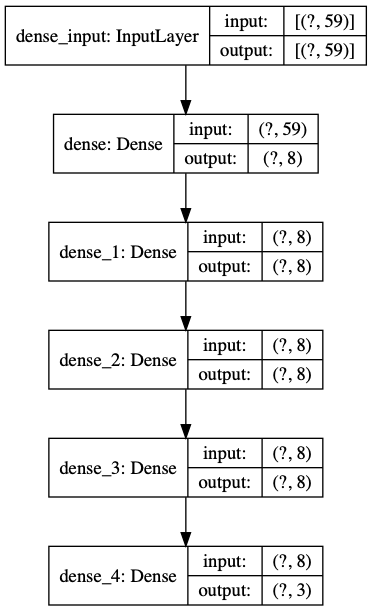

In [13]:
tf.keras.utils.plot_model(model, "titanic_model.png", show_shapes=True)

In [14]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

EPOCHS = 1000

history = model.fit(
  X_train, y_train.values,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop])

In [15]:
predicitions = model.predict(X_test)

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
model.evaluate(X_test, y_test.values, verbose=2)

163/163 - 0s - loss: 0.7887 - accuracy: 0.6637


[0.7887120246887207, 0.6637201905250549]

In [18]:
accuracy_score(y_test, predicitions.argmax(axis=1))

0.6637202152190622

In [27]:
precision_score(y_test, predicitions.argmax(axis=1), average='micro')

0.6637202152190622

In [35]:
print('Precision score', precision_score(y_test, predicitions.argmax(axis=1), average='micro'))
print('Recall score', (recall_score(y_test, predicitions.argmax(axis=1), average='micro')))
print('F1 score', f1_score(y_test, predicitions.argmax(axis=1), average='micro'))

#No CV or score

Precision score 0.6637202152190622
Recall score 0.6637202152190622
F1 score 0.6637202152190622
